<a href="https://colab.research.google.com/github/annaamikom/svm/blob/main/SVM_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM BREAST CANCER
SVM merupakan salah satu jenis supervised learning untuk menjalankan tugas klasifikasi. 

Tahapan penggunaan SVM adalah sebagai berikut:


1.   Import Library
2.   Load Dataset
3.   Check the General Information
4.   Handling Missing Values
5.   Exploratory Data Analysis (EDA)
6.   Splitting Data
7.   Modelling
8.   Evaluation

Class target: Benign =Non-Cancerous(1) vs Malignant=Cancerous(0)



let's get started !!!




In [ ]:
from sklearn import datasets
dir(datasets)

# 1. Import Library

In [2]:
#Import scikit-learn as dataset library
from sklearn import datasets
#Import matpotlib as plotting library
import matplotlib.pyplot as plt
#Import seaborn as statistic & graphic library
import seaborn as sns
#Import numpy for linear algebra
import numpy as np
#Import pandas for  data processing, CSV file I/O
import pandas as pd 


# 2. Load Dataset
dataset diambil dari sckit learn

In [4]:
#cek seluruh dataset yang terdapat pada sckit learn
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_cir

In [3]:
#Load dataset
cancer = datasets.load_breast_cancer()
# Convert into DataFrame:
dataframe_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dataframe_cancer['target'] = pd.Series(cancer.target)
dataframe_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 3. Check the General Information

In [5]:
#melihat ukuran dataset
dataframe_cancer.shape

(569, 31)

In [6]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
dataframe_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
dataframe_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# 4. Handling Missing Value

In [8]:
dataframe_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# 5. Exploratory Data Analysis (EDA)

digunakan untuk lebih mengenal data kita dan menemukan insights dari data

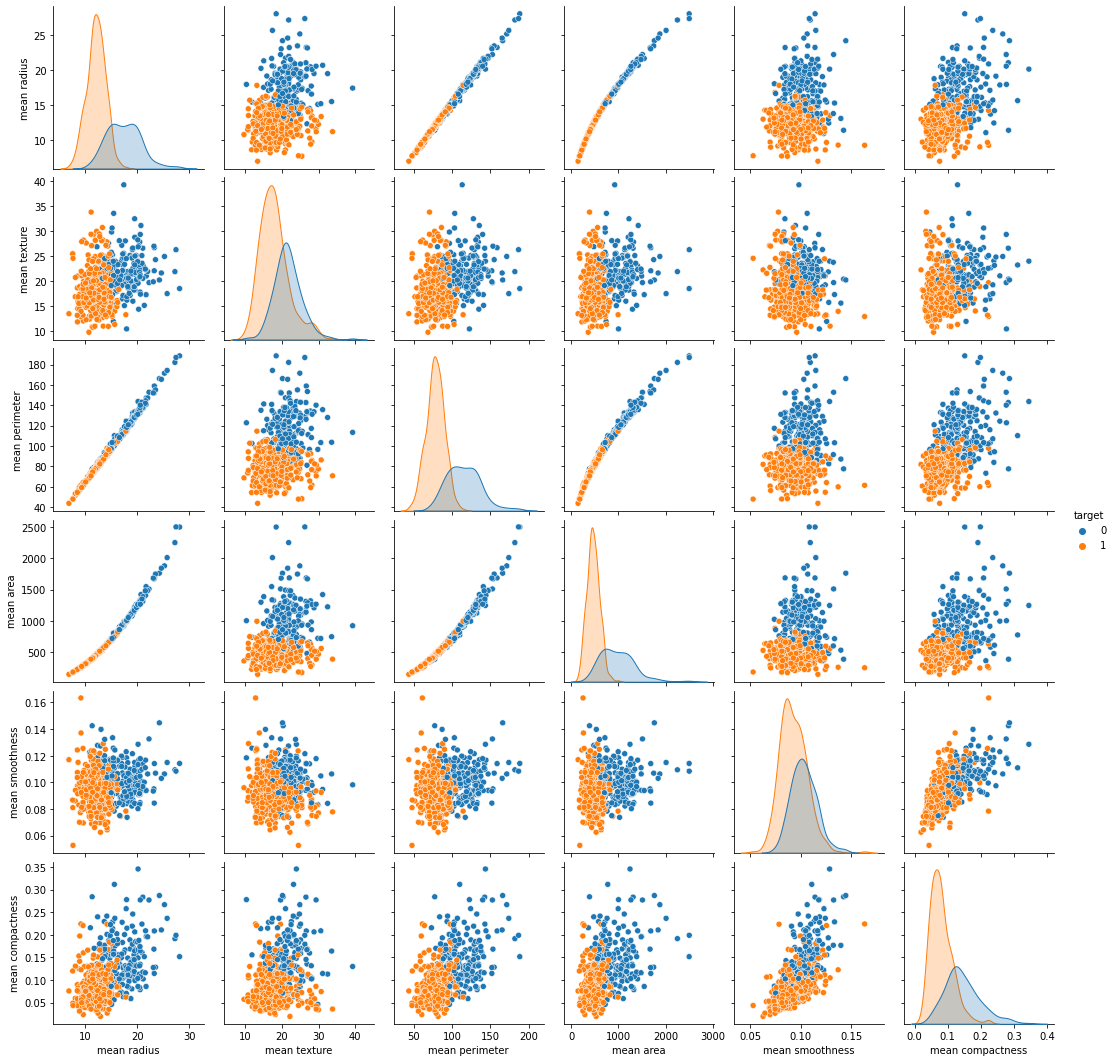

In [9]:
#visualisasi dengan seaborn
sns.pairplot(dataframe_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area', 'mean smoothness', 'mean compactness'])

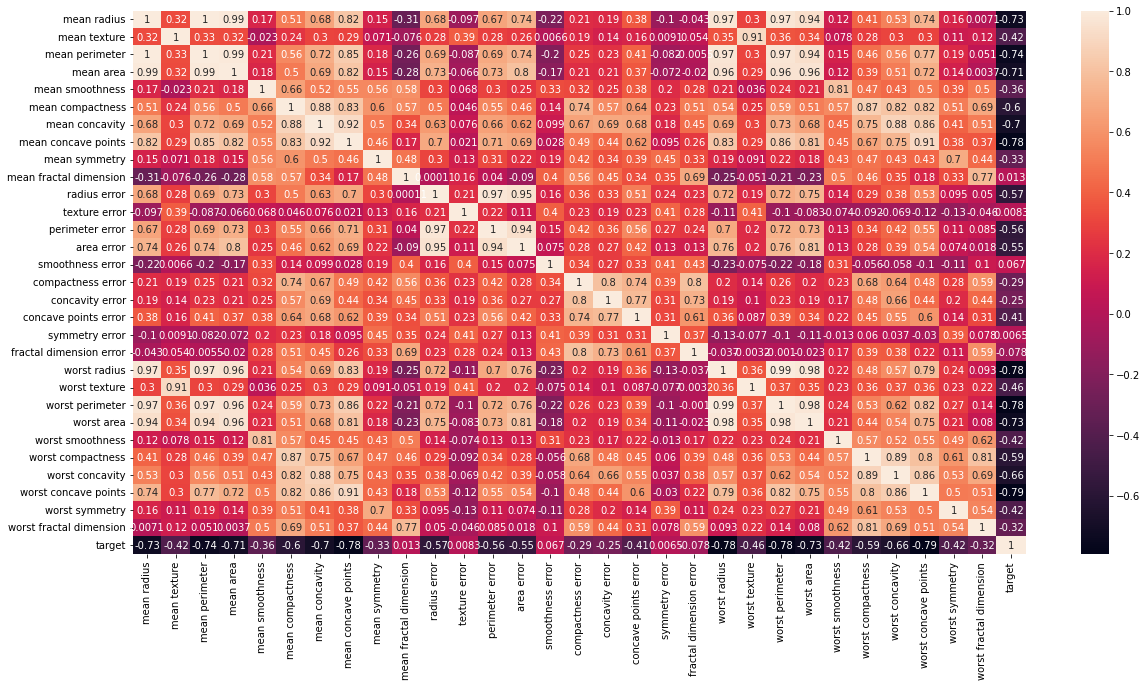

In [10]:
#To show correlation among the features we could use seaborn heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dataframe_cancer.corr(),annot=True)

# 6. Splitting Data

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
x=dataframe_cancer.drop(['target'],axis=1)
x.head()




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y=dataframe_cancer['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [40]:
# melihat jumlah masing-masing kelas target
dataframe_cancer.groupby(['target'])['target'].count()

target
0    212
1    357
Name: target, dtype: int64

berarti ada 212 data yang malignant/Cancerous dan 357 yang benign/Non-Cancerous

In [13]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=100) # 70% training and 30% test
#check the size of training set and test
print('size of training input (x)',x_train.shape)
print('size of training output/target (y)',y_train.shape)
print('size of testing input (x)',x_test.shape)
print('size of testing output/target (y)',y_test.shape)

size of training input (x) (398, 30)
size of training output/target (y) (398,)
size of testing input (x) (171, 30)
size of testing output/target (y) (171,)


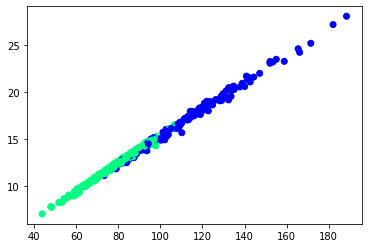

In [14]:
#visualize the training set

plt.scatter(x_train['mean perimeter'],x_train['mean radius'], c=y_train, cmap='winter')

# 7. Modelling

In [15]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')#(kernel='linear') # Linear Kernel




In [16]:

#Train the model using the training sets
clf.fit(x_train, y_train)

SVC(kernel='linear')

# 8. Evaluation

In [17]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

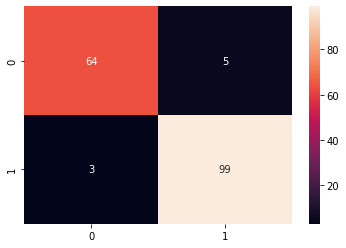

In [18]:
# import library for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
#visualize the confusion matrix using seaborn
sns.heatmap(cm,annot=True,fmt="d" )

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print(classification_report(y_test,y_pred))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.95      0.97      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9532163742690059


# Penggunaan 2 Fitur Untuk SVM: Mean Radius dan Mean perimeter

In [21]:
x_new=dataframe_cancer.iloc[:, [0, 2]]
x_new.head()

,mean radius,mean perimeter
0,17.99,122.80
1,20.57,132.90
2,19.69,130.00
3,11.42,77.58
4,20.29,135.10


In [22]:
# Split dataset into training set and test set
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new,y, test_size=0.3,random_state=100) # 70% training and 30% test

In [33]:
#check the size of training set and test
print('size of training input (x_new)',x_new_train.shape)
print('size of training output/target (y)',y_new_train.shape)
print('size of testing input (x_new)',x_new_test.shape)
print('size of testing output/target (y)',y_new_test.shape)

size of training input (x_new) (398, 2)
size of training output/target (y) (398,)
size of testing input (x_new) (171, 2)
size of testing output/target (y) (171,)


In [23]:
#Create a svm Classifier
clf_two_feature = svm.SVC(kernel='linear')#(kernel='linear') # Linear Kernel

In [27]:
#Train the model using the training sets
clf_two_feature.fit(x_new_train, y_new_train)

SVC(kernel='linear')

In [28]:
#Predict the response for test dataset
y_new_pred = clf_two_feature.predict(x_new_test)

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print(classification_report(y_new_test,y_new_pred))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_new_test, y_new_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        69
           1       0.87      0.96      0.91       102

    accuracy                           0.89       171
   macro avg       0.90      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171

Accuracy: 0.8888888888888888


# Contoh Prediksi Kasus Baru dengan 2 fitur

In [51]:
 #Create a function to guess when a data is benign or malignant
 
def benign_or_malignant(mean_radius,mean_perimeter):
    if(clf_two_feature.predict([[mean_radius,mean_perimeter]]))==0:
        print('Malignant/Cancerous')
    else:
        print('Benign/Non-Cancerous')

In [52]:
#misal kita prediksi apakah seseorang terkena kanker atau tidak dengan nilai mean radius:15.57 dan mean perimeter 127.00

benign_or_malignant(15.57, 127.00)

Malignant/Cancerous


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


# Reference

https://www.kaggle.com/joparga3/3-visualising-how-different-kernels-in-svms-work
